In [1]:
!wget https://storage.googleapis.com/tensorflow-1-public/course2/week3/horse-or-human.zip

--2024-11-29 07:12:37--  https://storage.googleapis.com/tensorflow-1-public/course2/week3/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.195.207, 142.251.183.207, 142.251.184.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.195.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘horse-or-human.zip’

horse-or-human.zip  100%[===================>] 142.65M   221MB/s    in 0.6s    

2024-11-29 07:12:38 (221 MB/s) - ‘horse-or-human.zip’ saved [149574867/149574867]



In [2]:
##!unzip /content/horse-or-human.zip

In [3]:
import zipfile
zipref=zipfile.ZipFile(r'horse-or-human.zip')
zipref.extractall('./horse-or-human')
zipref.close()

In [4]:
#os es un paquete libreria #posixpath es una representacion de open source
import os
os.path

<module 'posixpath' from '/usr/lib/python3.10/posixpath.py'>

In [5]:
#crear directorio
import os
# Directory with our training horse pictures
train_horse_dir=os.path.join('./horse-or-human/horses')
# Directory with our training human pictures
train_humans_dir=os.path.join('./horse-or-human/humans')

In [6]:
train_humans_dir

'./horse-or-human/humans'

In [7]:
train_horse_names=os.listdir(train_horse_dir)
print(train_horse_names[:10])
train_human_names=os.listdir(train_humans_dir)
print(train_human_names[:10])

['horse23-4.png', 'horse12-3.png', 'horse05-6.png', 'horse16-7.png', 'horse33-8.png', 'horse48-5.png', 'horse41-5.png', 'horse06-2.png', 'horse04-0.png', 'horse41-2.png']
['human03-26.png', 'human14-24.png', 'human07-02.png', 'human12-28.png', 'human14-23.png', 'human17-29.png', 'human09-08.png', 'human05-08.png', 'human14-11.png', 'human01-25.png']


In [8]:
#len devuelve el largo de la vista
print('total training horse images:', len(os.listdir(train_horse_dir)))
print('total training human images:', len(os.listdir(train_humans_dir)))

total training horse images: 500
total training human images: 527


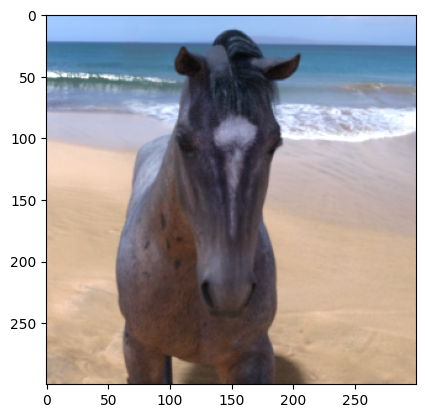

In [9]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
#guardar directorio
first=os.path.join(train_horse_dir, train_horse_names[10])
#mpimg leer imagen
img = mpimg.imread(first)
plt.imshow(img)

In [10]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

In [ ]:
[1,2,3]+[4,5,6]

[1, 2, 3, 4, 5, 6]

In [ ]:
l=["a","b","c"]
for i,j in enumerate(l):
  print(i,j)

0 a
1 b
2 c


In [11]:
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
#agrega la lista de 8 imagen distribuido por caballo y humano
next_horse_pix = [os.path.join(train_horse_dir, fname)
                for fname in train_horse_names[pic_index-8:pic_index]]
next_human_pix = [os.path.join(train_humans_dir, fname)
                for fname in train_human_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_horse_pix+next_human_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [12]:
import tensorflow as tf

In [13]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 300x300 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(60, (3,3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(40, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(30, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(30, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fifth convolution
    #tf.keras.layers.Conv2D(, (3,3), activation='relu'),
    #tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('horses') and 1 for the other ('humans')
    tf.keras.layers.Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 298, 298, 60)        │           1,680 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 149, 149, 60)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 147, 147, 40)        │          21,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 73, 73, 40)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 71, 71, 30)          │          10,830 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 35, 35, 30)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 33, 33, 30)          │           8,130 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 16, 16, 30)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 7680)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       3,932,672 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,975,465 (15.17 MB)

 Trainable params: 3,975,465 (15.17 MB)

 Non-trainable params: 0 (0.00 B)

In [15]:
#from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer="adam",
              metrics=['accuracy'])

In [16]:
import tensorflow as tf
from tensorflow import keras

In [17]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [18]:
train_datagen = ImageDataGenerator(rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest',rescale=1/255,validation_split=0.2)
train_generator=train_datagen.flow_from_directory(
    './horse-or-human',
    target_size=(300,300),
    batch_size=128,
    class_mode='binary',
    subset="training"
)

Found 822 images belonging to 2 classes.


In [20]:
test_generator=train_datagen.flow_from_directory(
    './horse-or-human',
    target_size=(300,300),
    batch_size=128,
    class_mode='binary',
    subset="validation"
)

Found 205 images belonging to 2 classes.


In [ ]:
#x_train,y_train=next(train_generator)

In [ ]:
#y_train.shape

In [ ]:
#x_test,y_test=next(test_generator)

In [21]:
history = model.fit(
      train_generator,
      epochs=20,
      batch_size=30,
      verbose=1,validation_data=test_generator)

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


7/7 ━━━━━━━━━━━━━━━━━━━━ 266s 35s/step - accuracy: 0.5082 - loss: 0.7206 - val_accuracy: 0.4878 - val_loss: 0.7707
Epoch 2/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 230s 29s/step - accuracy: 0.4904 - loss: 0.7771 - val_accuracy: 0.5122 - val_loss: 0.6948
Epoch 3/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 229s 32s/step - accuracy: 0.5460 - loss: 0.6754 - val_accuracy: 0.5268 - val_loss: 0.6726
Epoch 4/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 265s 29s/step - accuracy: 0.7178 - loss: 0.6424 - val_accuracy: 0.7512 - val_loss: 0.5830
Epoch 5/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 233s 30s/step - accuracy: 0.7044 - loss: 0.5689 - val_accuracy: 0.7366 - val_loss: 0.5458
Epoch 6/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 232s 30s/step - accuracy: 0.7941 - loss: 0.4781 - val_accuracy: 0.7122 - val_loss: 0.5619
Epoch 7/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 261s 29s/step - accuracy: 0.7871 - loss: 0.4478 - val_accuracy: 0.6683 - val_loss: 0.5958
Epoch 8/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 231s 29s/step - accuracy: 0.7647 - loss: 0.4703 - val_accuracy: 0.6780 - val_loss: 0.5984
Epo

In [ ]:
import numpy as np
from google.colab import files
from tensorflow.keras.utils import load_img, img_to_array

uploaded = files.upload()

for fn in uploaded.keys():
  print(fn)
  # predicting images
  path = '/content/' + fn
  img = load_img(path, target_size=(300, 300))

  x = img_to_array(img)
  x /= 255
  print(f"shape of image:{x.shape}")
  x = np.expand_dims(x, axis=0)
  #print(x)
  images = np.vstack([x])
  #print(images)
  classes = model.predict(images, batch_size=10)
  print(classes)
  print(classes[0])

  if classes[0]>0.5:
    print(fn + " is a human")
  else:
    print(fn + " is a horse")

In [ ]:
#transfer learning model
from keras.applications import EfficientNetB4

In [ ]:
base_model=EfficientNetB4(
    include_top=False,
    weights="imagenet",
    pooling="avg",
    input_shape=(300,300,3)
)

71686520/71686520 [==============================] - 0s 0us/step


In [ ]:
for layer in base_model.layers[:-2]:
  layer.trainable=False

In [ ]:
from keras import regularizers

In [ ]:
model=keras.Sequential([base_model,
                        keras.layers.Dense(100,activation="relu",kernel_regularizer=keras.regularizers.L1(0.02)),
                        keras.layers.Dense(50,activation="relu",kernel_regularizer=keras.regularizers.L1(0.02)),
                        keras.layers.Dense(1,activation="sigmoid")
                        ])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb4 (Functional  (None, 1792)              17673823  
 )                                                               
                                                                 
 dense_3 (Dense)             (None, 100)               179300    
                                                                 
 dense_4 (Dense)             (None, 50)                5050      
                                                                 
 dense_5 (Dense)             (None, 1)                 51        
                                                                 
Total params: 17858224 (68.12 MB)
Trainable params: 184401 (720.32 KB)
Non-trainable params: 17673823 (67.42 MB)
_________________________________________________________________


In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer="adam",
              metrics=['accuracy'])

In [ ]:
history = model.fit(
      train_generator,
      epochs=20,
      verbose=1,validation_data=test_generator)

Epoch 1/20
7/7 [==============================] - 51s 5s/step - loss: 100.2688 - accuracy: 0.5134 - val_loss: 87.8570 - val_accuracy: 0.5122
Epoch 2/20
7/7 [==============================] - 29s 4s/step - loss: 79.5889 - accuracy: 0.5182 - val_loss: 67.3498 - val_accuracy: 0.5122
Epoch 3/20
7/7 [==============================] - 30s 4s/step - loss: 59.8879 - accuracy: 0.5255 - val_loss: 49.9884 - val_accuracy: 0.5122
Epoch 4/20
7/7 [==============================] - 29s 4s/step - loss: 44.1407 - accuracy: 0.5024 - val_loss: 35.6487 - val_accuracy: 0.5122
Epoch 5/20
7/7 [==============================] - 30s 4s/step - loss: 30.4167 - accuracy: 0.5097 - val_loss: 24.3328 - val_accuracy: 0.5122
Epoch 6/20
2/7 [=======>......................] - ETA: 17s - loss: 23.6508 - accuracy: 0.4297

In [ ]:
import numpy as np
from google.colab import files
from tensorflow.keras.utils import load_img, img_to_array

uploaded = files.upload()

for fn in uploaded.keys():
  print(fn)
  # predicting images
  path = '/content/' + fn
  img = load_img(path, target_size=(300, 300))

  x = img_to_array(img)
  x /= 255
  print(f"shape of image:{x.shape}")
  x = np.expand_dims(x, axis=0)
  #print(x)
  images = np.vstack([x])
  #print(images)
  classes = model.predict(images, batch_size=10)
  print(classes)
  print(classes[0])

Saving horse-561221_640.jpg to horse-561221_640 (1).jpg
horse-561221_640 (1).jpg
shape of image:(300, 300, 3)
1/1 [==============================] - 0s 157ms/step
[[-0.09604555  0.09024832 -0.11438389 ... -0.17374106 -0.19344954
  -0.13107847]]
[-0.09604555  0.09024832 -0.11438389 ... -0.17374106 -0.19344954
 -0.13107847]


In [ ]:
classes.shape

(1, 1792)

In [ ]:
import numpy as np
np.argmax(classes[0])

1187

In [ ]:
!pip install keras-tuner

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.9/128.9 kB 2.8 MB/s eta 0:00:00


In [ ]:
import keras_tuner as kt

In [ ]:
from tensorflow.keras.applications import EfficientNetB4
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras import regularizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from kerastuner.tuners import RandomSearch

def build_model(hp):
    base_model = EfficientNetB4(
        include_top=False,
        weights="imagenet",
        input_shape=(224, 224, 3),
        pooling="avg",
    )

    for layer in base_model.layers:
        layer.trainable = False

    model = Sequential([base_model])

    model.add(Dense(hp.Int(f"dense_units_1", 128, 512, 64), activation="relu", kernel_regularizer=regularizers.l2(0.001)))
    model.add(Dropout(hp.Float(f"dropout_1", 0.2, 0.5, 0.1)))

    model.add(Dense(hp.Int(f"dense_units_2", 64, 256, 32), activation="relu", kernel_regularizer=regularizers.l2(0.001)))
    model.add(Dropout(hp.Float(f"dropout_2", 0.2, 0.5, 0.1)))

    model.add(Dense(hp.Int(f"dense_units_3", 32, 128, 16), activation="relu", kernel_regularizer=regularizers.l2(0.001)))
    model.add(Dropout(hp.Float(f"dropout_3", 0.2, 0.5, 0.1)))

    model.add(Dense(1, activation="sigmoid"))

    opt = Adam(learning_rate=hp.Float("learning_rate", 1e-4, 1e-2, sampling="log"))

    model.compile(
        optimizer=opt,
        loss="binary_crossentropy",
        metrics=["accuracy"],
    )

    return model

In [ ]:
tuner=kt.RandomSearch(build_model,
                      objective="val_accuracy",
                      max_trials=5,
                      directory="tuning",
                      project_name="version1")

71686520/71686520 [==============================] - 0s 0us/step


In [ ]:
tuner.search(train_generator,epochs=5,validation_data=test_generator)

Trial 5 Complete [00h 03m 29s]
val_accuracy: 0.5121951103210449

Best val_accuracy So Far: 0.5121951103210449
Total elapsed time: 00h 17m 28s


In [ ]:
model=tuner.get_best_models(num_models=1)[0]

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb4 (Functional  (None, 1792)              17673823  
 )                                                               
                                                                 
 dense (Dense)               (None, 512)               918016    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 112)               28784     
                                                        

In [ ]:
model.layers.weights

[<tf.Variable 'dense_2/kernel:0' shape=(256, 112) dtype=float32, numpy=
 array([[ 0.01506241,  0.0216203 , -0.10783859, ..., -0.09300178,
         -0.02536462, -0.06461875],
        [ 0.10357965, -0.12470482, -0.06312867, ..., -0.03829058,
         -0.08479248,  0.07983901],
        [-0.0549641 ,  0.03457386,  0.06887087, ...,  0.00421941,
          0.00999147,  0.04620368],
        ...,
        [ 0.05756057,  0.05593073, -0.108324  , ...,  0.05303119,
          0.00412098, -0.03340778],
        [ 0.0337628 ,  0.1124946 ,  0.03787283, ..., -0.00285641,
         -0.03660459, -0.05530477],
        [ 0.03767568,  0.00770835, -0.02601051, ..., -0.02906633,
         -0.07710034, -0.01487143]], dtype=float32)>,
 <tf.Variable 'dense_2/bias:0' shape=(112,) dtype=float32, numpy=
 array([-1.81442522e-03, -1.07969381e-02, -4.82903607e-03, -1.47842094e-02,
        -2.17575096e-02,  1.43534737e-02,  8.21364485e-03,  2.05972092e-03,
        -2.86612716e-02, -1.10238511e-02, -6.36579003e-03, -8.35328